In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pickle
from mpl_toolkits.mplot3d import axes3d

import seaborn as sns
import matplotlib.patches as patches
import netCDF4
import paramiko

In [3]:
fname_list = list()
fpath_list = list()
base_list  = list()

ssh = paramiko.SSHClient()
ssh.set_missing_host_key_policy(paramiko.AutoAddPolicy)
fname_list.append("co_Ne_0")
fpath_list.append("/home/chanyeong/solps-iter/runs/conventionalgeo_Ne_zero")
    
fname_list.append("new_mesh_al_Ne_0")
fpath_list.append("/home/chanyeong/solps-iter/runs/SAS_Ne_zero")


ID = input("Insert ID : ")
pw =  getpass.getpass("Insert P.W : ")

ssh.connect("143.248.99.71",username="%s" %ID,password="%s" %pw)
print('ssh ws4 connected')
sftp = ssh.open_sftp()

Insert ID :  chanyeong
Insert P.W :  satirev147


ssh ws4 connected


In [8]:
data_list.append("fht")
nx = 96
ny = 36
ns = 20

def find_ni(fname):
    with open(fname) as f:
        line = f.readlines()
        print(line)
    return line

for data_ran in range(len(fname_list)):
	dum_name = fname_list[data_ran]
	fname    =  "./b2fplasmf_%s.txt"    %fname_list[data_ran]
	file     = sftp.get('/%s/b2fplasmf' %fpath_list[data_ran], '%s' %fname)
    nc_file  = sftp.get('/%s/balance.nc'%fpath_list[data_ran], '%s_balance.nc' %fname)
	with open(fname,'r') as f:
		line = f.readlines()    
	a=type(line)
	k = len(line)
	data_array  = np.array(line)
	full_length = np.size(data_array)

	for var_ran in range(len(data_list)):
		data_name = data_list[var_ran]


		raw_data = np.empty((full_length,6))

		for i in range(0, full_length):

			dum = line[i].split()
			dum2 = len(dum)

			for j in range(6):
				if j+1<=len(dum):
					dum3 = dum[j]

					try:
						raw_data[i,j] = dum3
					except ValueError as m:
						raw_data[i,j] = 0
                    #print(dum3)
				elif j+1>len(dum):
					continue

		for i in range(0, full_length):  
			dum = line[i].split()
			dum2 = len(dum)
			for j in range(6):
				if j+1<=len(dum):
					dum3 = dum[j]
					try:
						raw_data[i,j] = dum3
					except ValueError as m:
						raw_data[i,j] = 0
                        #print(line[i])
						break;
				elif j+1>len(dum):
					continue

		check_array = np.empty((1,6))
		for ch in range(full_length):
			if data_name in line[ch]:
				if line[ch].split()[3]==data_name:
					position_start = ch+1
					break;
				else:
					continue
			else:
				continue

		for ch2 in range(position_start+1,full_length):
			try:
				check_cf = line[ch2].split()
				check_er = float(check_cf[0])
			except ValueError as m:
				position_end = ch2-1
        #        print(ch2)
				break;

        #print(line[position_end])
		check_length = line[position_start-1].split()
		tot_len =int(check_length[2])




		line[250193].split()[3] == data_name


		selected_length = position_end-position_start
		selected_data = np.zeros((selected_length+1,6))

		for i in range(position_start, position_end+1):
			dum = line[i].split()
            #print(line[i])
			dum2 = len(dum)
			for j in range(dum2):
				dum3 = dum[j]
				selected_data[i-position_start,j] = dum3    

        #    for j in range(6):
        #        if j+1<=len(dum):
        #            dum3 = dum[j]
        #            try:
        #                selected_data[i-position_start,j] = dum3
        #            except ValueError as m:
        #                selected_data[i-position_start,j] = 0.0
        #            #print(dum3)
        #        elif j+1>len(dum):
        #            continue



		numerical_len = np.shape(selected_data)[0]*np.shape(selected_data)[1]

		np.shape(selected_data)
		selected_data_merged = selected_data.reshape(numerical_len,1)
		selected_data_merged_deleted = selected_data_merged[:tot_len,0]


		if check_length[2] == '3724':
			selected_data_final = selected_data_merged_deleted.reshape(ny+2,nx+2)
		elif check_length[2]== '7448':
			selected_data_final = selected_data_merged_deleted.reshape(2, ny+2,nx+2)
		else:
			selected_data_final = selected_data_merged_deleted.reshape(ns, ny+2,nx+2)

		np.save("./fht_%s.npy" %fname, selected_data_final)

        #selected_data_final = selected_data_merged_deleted.reshape(ns, ny+2,nx+2)

        #print(selected_data_final[0,:,3])

        #selected_data_final[0,:,96]

        #map_plot = plt.pcolormesh(selected_data_final[1,:,:])
        #plt.savefig(data_name)
        #plt.title(data_name)
        #plt.colorbar()
        #plt.show()

		x_axis = np.linspace(1,98,98)
		y_axis = np.linspace(1,38,38)
			
	delete = "rm %s" %fname
	os.system(delete)
ssh.close()

In [40]:
def heat_flux(valname):
    total_heat_loc = 1000000
    fht_local = valname

    heat_outer_diver = np.sum((fht_local[1,1:,96]))/total_heat_loc+np.sum((fht_local[0,1:,96]))/total_heat_loc

    heat_inner_diver = np.sum((fht_local[1,1:,1]))/total_heat_loc+np.sum((fht_local[0,1:,1]))/total_heat_loc

    heat_PRF = (np.sum((fht_local[1,1,77:]))+np.sum((fht_local[1,1,:11])))/total_heat_loc

    sol_heat = (np.sum(fht_local[0,37,:])+np.sum(fht_local[1,37,:]))/total_heat_loc

    core_heat = (np.sum((fht_local[0,0,11:77]))+np.sum((fht_local[1,0,11:77])))/total_heat_loc

    return heat_outer_diver,-heat_inner_diver,heat_PRF,sol_heat,-core_heat

def Global_internal_energy_balance(fht,nc):

    fht = np.load("./%s" %fht)
    total_fht = heat_flux(fht)
    nc_balance = netCDF4.Dataset(nc)
    eirene_mc_eael_she_bal = nc_balance['eirene_mc_eael_she_bal'][:]
    eirene_mc_emel_she_bal = nc_balance['eirene_mc_emel_she_bal'][:]
    eirene_mc_eiel_she_bal = nc_balance['eirene_mc_eiel_she_bal'][:]
    eirene_mc_epel_she_bal = nc_balance['eirene_mc_epel_she_bal'][:]

    eirene_mc_eapl_shi_bal = nc_balance['eirene_mc_eapl_shi_bal'][:]
    eirene_mc_empl_shi_bal = nc_balance['eirene_mc_empl_shi_bal'][:]
    eirene_mc_eipl_shi_bal = nc_balance['eirene_mc_eipl_shi_bal'][:]
    eirene_mc_eppl_shi_bal = nc_balance['eirene_mc_eppl_shi_bal'][:]


    def eirene_sum():
        sum_eirene_mc_eael_she_bal = np.sum(eirene_mc_eael_she_bal)
        sum_eirene_mc_emel_she_bal = np.sum(eirene_mc_emel_she_bal)
        sum_eirene_mc_eiel_she_bal = np.sum(eirene_mc_eiel_she_bal)
        sum_eirene_mc_epel_she_bal = np.sum(eirene_mc_epel_she_bal)

        sum_eirene_mc_eapl_shi_bal = np.sum(eirene_mc_eapl_shi_bal)
        sum_eirene_mc_empl_shi_bal = np.sum(eirene_mc_empl_shi_bal)
        sum_eirene_mc_eipl_shi_bal = np.sum(eirene_mc_eipl_shi_bal)
        sum_eirene_mc_eppl_shi_bal = np.sum(eirene_mc_eppl_shi_bal)

        return (sum_eirene_mc_eael_she_bal+sum_eirene_mc_emel_she_bal+sum_eirene_mc_eiel_she_bal+sum_eirene_mc_epel_she_bal +sum_eirene_mc_eapl_shi_bal+sum_eirene_mc_eapl_shi_bal+sum_eirene_mc_eapl_shi_bal+sum_eirene_mc_eapl_shi_bal)/1000000

    def radiation_loss():
        stel_terms  = np.sum(nc_balance['b2stel_she_bal'][:])+np.sum(nc_balance['b2stel_she_ion_bal'][:])+np.sum(nc_balance['b2stel_she_rec_bal'][:])+np.sum(nc_balance['b2stel_shi_ion_bal'][:])+np.sum(nc_balance['b2stel_shi_rec_bal'][:]) 
        return (stel_terms/1000000)

    
    def other_source():
        heat_source = np.sum(nc_balance['b2srst_shi_bal'][:])+np.sum(nc_balance['b2srst_she_bal'][:])
        joule = np.sum(nc_balance['b2sihs_joule_bal'][:])
        div   = np.sum(nc_balance['b2sihs_divue_bal'][:])+np.sum(nc_balance['b2sihs_divua_bal'][:])

        return (heat_source+joule+div)/1000000

    def heating_terms(): #these terms are heat "into" the plasma
        fraa     = np.sum(nc_balance['b2sihs_fraa_bal'][:])
        visa     = np.sum(nc_balance['b2sihs_visa_bal'][:])
        srdt_shi = np.sum(nc_balance['b2srdt_shi_bal'][:])
        srdt_she = np.sum(nc_balance['b2srdt_she_bal'][:])
        return (fraa+visa+srdt_shi+srdt_she)/1000000
    
    
#    print(sum(heat_flux(total_fhe)))
#    print(sum(heat_flux(total_fhi)))

#    plt.title("Energy Balance")
#    x = [r'$P_{t, out}$',r'$P_{t, in}$',r'$P_{t, radial}$',r'$P_{neutral-plasma interaction}$',r'$P_{radiation}$',r'$P_{etc}$']
#    y = [heat_flux(fht)[0],heat_flux(fht)[1],heat_flux(fht)[2]+heat_flux(fht)[3]+heat_flux(fht)[4],-eirene_sum(),-radiation_loss(),-other_source()]
#    plt.bar(x,y)
#    plt.axhline(color = 'black',linewidth = 0.5)

    plt.show()
    return [heat_flux(fht)[0],heat_flux(fht)[1],heat_flux(fht)[2]+heat_flux(fht)[3]+heat_flux(fht)[4],-eirene_sum(),-radiation_loss(),-other_source()]

fname_list = list()
fname_list.append("co_Ne_0_KSTAR")
fname_list.append("new_mesh_al_Ne_0_KSTAR")

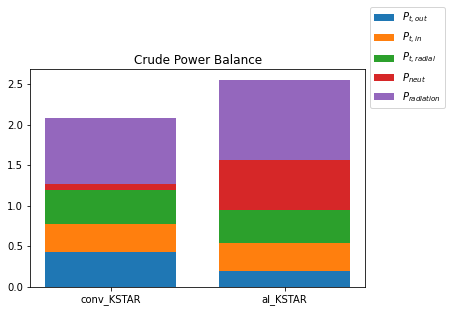

In [69]:
out_div = np.zeros(len(fname_list))
in_div = np.zeros(len(fname_list))

neutral_loss = np.zeros(len(fname_list))
rad_loss = np.zeros(len(fname_list))
other = np.zeros(len(fname_list))



for k in range(len(fname_list)):
    fht_name = "fht_b2fplasmf_%s.npy" %fname_list[k]
    nc_name = "%s_balance.nc" %fname_list[k]
    dat = Global_internal_energy_balance(fht_name,nc_name)
    out_div[k]=dat[0]
    in_div[k]=dat[1]
    neutral_loss[k]=dat[2]
    rad_loss[k]=dat[3]
    other[k]=dat[4]

name_array = [r'$P_{t, out}$',r'$P_{t, in}$',r'$P_{t, radial}$',r'$P_{neut}$',r'$P_{radiation}$',r'$P_{etc}$']

data_array = ["conv_KSTAR", "al_KSTAR"]
    
power_data = [out_div,in_div,neutral_loss,rad_loss,other]
x_axis = []
for sp in range(len(fname_list)):
    x_axis.append((sp+1)*0.4)

for i in range(5):
    plt.bar(
        x_axis,
        power_data[i],
        # 누적하기 위해 bottom 업데이트
        bottom=np.sum(power_data[:i], axis=0),
        label = '%s' %name_array[i],
        width = 0.3
    )
    plt.xticks(x_axis,data_array)
    
plt.title("Crude Power Balance")
plt.legend(loc="lower left",bbox_to_anchor=(1.0,0.8))    
plt.savefig("Crude_Power_Balance")
plt.show()

In [67]:
print(x_axis)

[0.4, 0.8]


In [42]:
print(out_div)
print(in_div)

[0.42945349 0.1919932 ]
[0.34748958 0.34442822]


In [39]:
type(x)

numpy.ndarray

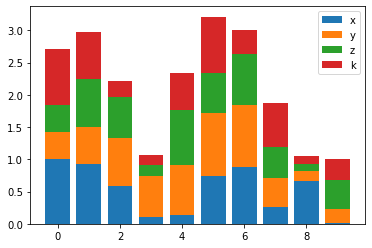

In [43]:
x = np.random.rand(10)
y = np.random.rand(10)
z = np.random.rand(10)
k = np.random.rand(10)


data = [x, y, z,k]
data_name = ["x", "y", "z","k"]


x_array = np.arange(10)

# 누적 막대 그래프 그리기
for i in range(0, 4):
    plt.bar(
        x_array,
        data[i],
        # 누적하기 위해 bottom 업데이트
        bottom=np.sum(data[:i], axis=0),
        label = '%s' %data_name[i]
        
    )

plt.legend()
plt.show()

In [36]:
type(data)

list

In [6]:
fname_list.append("co_Ne_0_KSTAR")
fname_list.append("new_mesh_al_Ne_0_KSTAR")


for k in range(len(fname_list)):
    fht_name = "./fht_%s.npy" %fname_list[k]
    nc_name = "%s_balance.nc" %fname_list[k]
    data1=Global_internal_energy_balance(fht_name,nc_name)[0]
    data2=Global_internal_energy_balance(fht_name,nc_name)[1]
    data3=Global_internal_energy_balance(fht_name,nc_name)[2]
    data4=Global_internal_energy_balance(fht_name,nc_name)[3]
    data5=Global_internal_energy_balance(fht_name,nc_name)[4]
    data6=Global_internal_energy_balance(fht_name,nc_name)[5]
    data7=Global_internal_energy_balance(fht_name,nc_name)[6]
    data8=Global_internal_energy_balance(fht_name,nc_name)[7]

    year=["Power balance"]
    plt.figure(figsize=(4,7))
    plt.bar(year,data1,color="green",label="heat flux")
    plt.bar(year,data2,color="yellow",bottom=data3,label="eirene")
    plt.bar(year,data3,color="blue",bottom=[sum(data) for data in zip(data1,data2)],label=r"%P_{t,out}%")
    plt.bar(year,data4,color="red",bottom=[sum(data) for data in zip(data1,data2,data3)],label=r"%P_{t,in}%")
    plt.bar(year,data5,color="black",bottom=[sum(data) for data in zip(data1,data2,data3,data4)],label=r"%P_{t,radial}%")
    plt.bar(year,data6,color="orange",bottom=[sum(data) for data in zip(data1,data2,data3,data4,data5)],label=r"$P_{neutral}$")
    plt.bar(year,data7,color="pink",bottom=[sum(data) for data in zip(data1,data2,data3,data4,data5,data6)],label=r"$P_{rad}$")
    plt.bar(year,data8,color="brown",bottom=[sum(data) for data in zip(data1,data2,data3,data4,data5,data6,data7)],label=r"$P_{etc}$")



    plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))    
    plt.savefig("Crude Power Balance of %s" %fname_list[k])
    plt.show()




NameError: name 'Global_internal_energy_balance' is not defined